In [12]:
import sys
sys.path.insert(0, '../Aaron/Filters')

import log_mean

In [13]:
import numpy as np
import pandas as pd

In [14]:
train = pd.read_json("../train.json")
test = pd.read_json("../test.json")

In [15]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)

In [16]:
x_bandnew = log_mean.log_df(x_band1)
x_bandnew.shape

(1604, 75, 75)

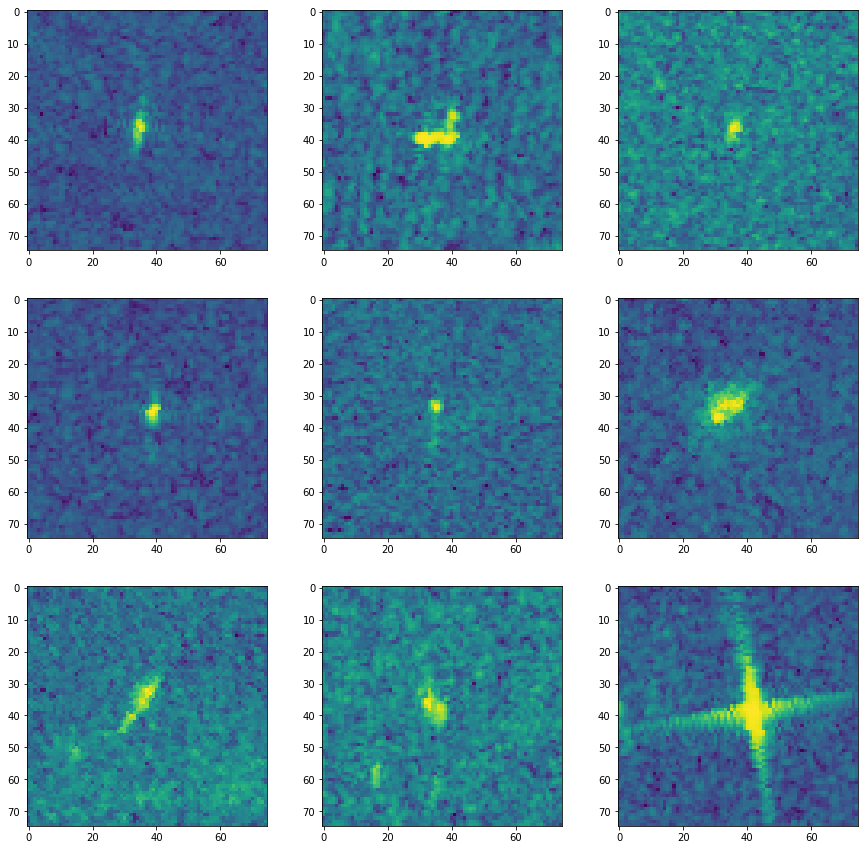

Filtered through lee


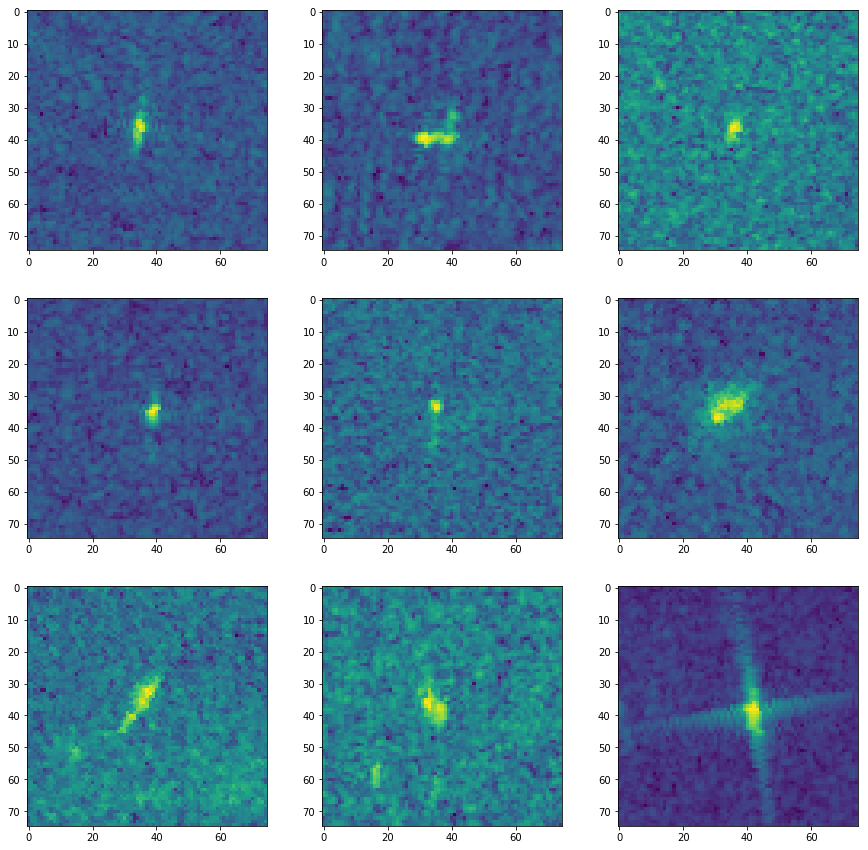

Unfiltered


In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(x_bandnew[i])
plt.show()
print('Filtered through lee')
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(x_band1[i])
plt.show()
print('Unfiltered')

In [7]:
x_band1[0]

array([[-27.87836075, -27.15415955, -28.66861534, ..., -25.57348251,
        -26.48867416, -30.50701332],
       [-28.66852951, -27.8784008 , -27.50877571, ..., -26.4886322 ,
        -28.67156219, -31.5941658 ],
       [-28.66852951, -27.15415955, -25.86504173, ..., -27.1571064 ,
        -27.88139343, -32.83712387],
       ..., 
       [-29.09290504, -28.66916275, -30.50461197, ..., -30.0110054 ,
        -25.8685379 , -26.48926544],
       [-31.59168243, -27.87899208, -28.66920471, ..., -27.51227188,
        -26.81707382, -27.51235771],
       [-29.09290504, -26.81408119, -27.15479088, ..., -26.81703186,
        -27.8819828 , -28.26812744]], dtype=float32)

In [8]:
np.max(x_bandnew[0])

-0.213149

In [9]:
for i in range(0,10):
    print(np.max(x_band1[i]))

-0.213149
12.5704
-9.91848
4.79563
-6.95604
3.86404
-10.3501
-13.9976
28.5789
-5.6063


In [10]:
for i in range(0,10):
    print(np.max(x_bandnew[i]))

-0.213149
2.60789
-9.91848
1.7571
-6.95604
1.58187
-10.3501
-13.9976
3.38706
-5.6063


In [11]:
print(np.max(x_band1[0] - x_bandnew[0]))

0.0
